In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import RocCurveDisplay
from sklearn.preprocessing import label_binarize

In [4]:
df = pd.read_excel('heart_disease.xlsx')

In [5]:
df.head()

age   sex               cp  trestbps  chol    fbs         restecg  thalch  \
0   63  Male   typical angina       145   233   True  lv hypertrophy     150   
1   41  Male  atypical angina       135   203  False          normal     132   
2   57  Male     asymptomatic       140   192  False          normal     148   
3   52  Male   typical angina       118   186  False  lv hypertrophy     190   
4   57  Male     asymptomatic       110   201  False          normal     126   

   exang  oldpeak        slope          thal  num  
0  False      2.3  downsloping  fixed defect    0  
1  False      0.0         flat  fixed defect    0  
2  False      0.4         flat  fixed defect    0  
3  False      0.0         flat  fixed defect    0  
4   True      1.5         flat  fixed defect    0

In [6]:
df.describe()

age    trestbps        chol      thalch     oldpeak         num
count  908.000000  908.000000  908.000000  908.000000  846.000000  908.000000
mean    53.791850  133.430617  201.484581  135.957048    0.891253    1.008811
std      9.158031   20.401608  112.097949   26.804929    1.093875    1.144436
min     29.000000    0.000000    0.000000   60.000000   -2.600000    0.000000
25%     47.750000  120.000000  176.750000  118.000000    0.000000    0.000000
50%     54.000000  130.000000  224.000000  138.000000    0.500000    1.000000
75%     60.000000  144.000000  270.000000  156.000000    1.500000    2.000000
max     77.000000  200.000000  603.000000  202.000000    6.200000    4.000000

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [8]:
print(df.isnull().sum())

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64


In [9]:
# Fill missing values in 'oldpeak' with the mean value
df['oldpeak'].fillna(df['oldpeak'].mean(), inplace=True)

# Check again for missing values
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64


In [14]:
# Display the data types of each column
print(df.dtypes)

age           int64
sex           int32
cp            int32
trestbps      int64
chol          int64
fbs           int64
restecg       int32
thalch        int64
exang        object
oldpeak     float64
slope        object
thal         object
num           int64
dtype: object


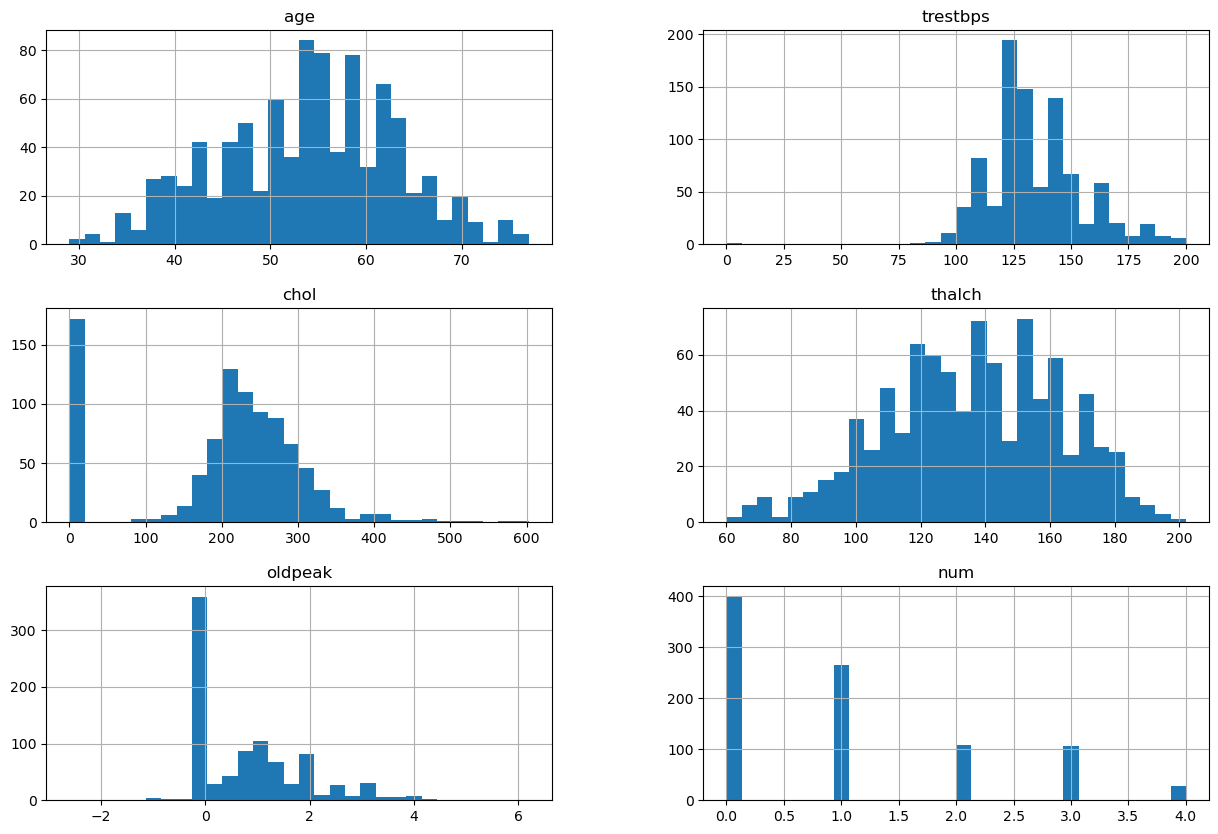

In [10]:
# Histograms for numerical features
df.hist(bins=30, figsize=(15, 10))
plt.show()

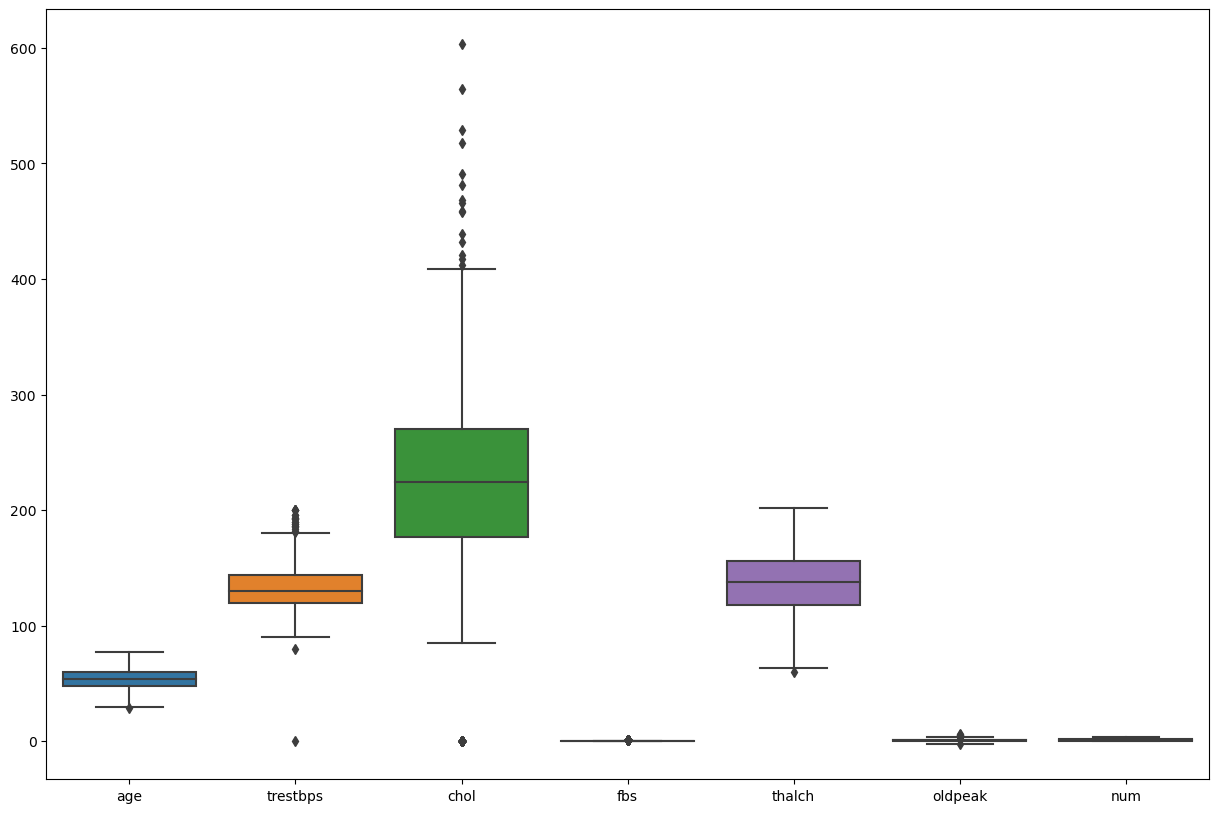

In [11]:
# Box plots for numerical features to check for outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.show()


C:\Users\vinit\AppData\Local\Temp\ipykernel_12164\3462186946.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


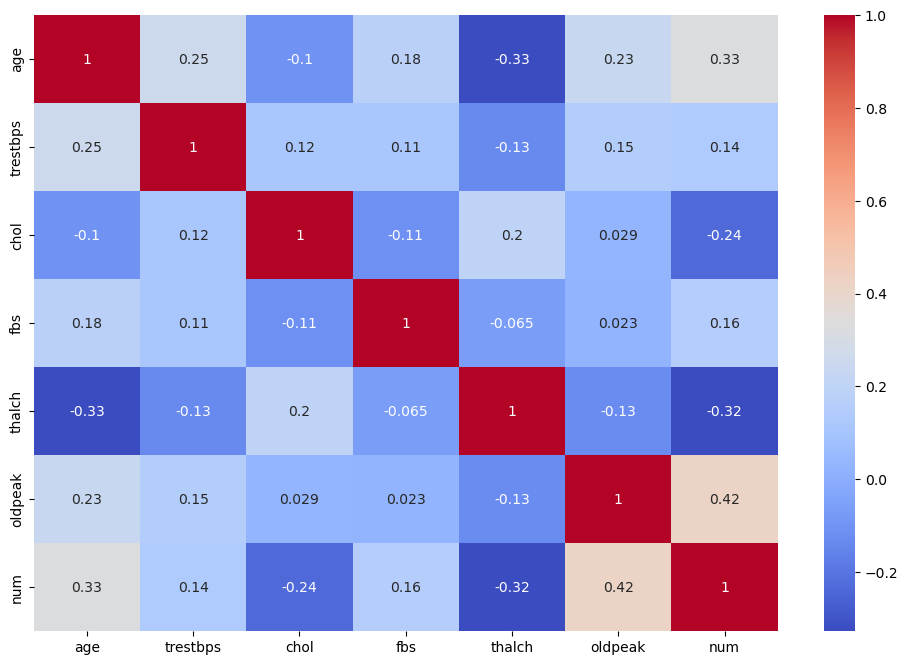

In [12]:
# Correlation matrix for numerical features
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [15]:
# Convert boolean columns to integers (0 and 1)
bool_columns = df.select_dtypes(include=['bool']).columns
df[bool_columns] = df[bool_columns].astype(int)

# Ensure all categorical columns are strings
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'num']
for col in categorical_columns:
    df[col] = df[col].astype(str)

In [16]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encoding categorical variables
label_encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

In [17]:
# Scaling numerical features
scaler = StandardScaler()
numerical_columns = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [18]:
# Define features (X) and target (y)
X = df.drop('num', axis=1)  # Assuming 'num' is the target column
y = df['num']

In [22]:
# Split the dataset (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
# Initialize and train the model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [24]:
# Predict on the test set
y_pred = clf.predict(X_test)

In [25]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test), multi_class='ovr')


In [26]:
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"ROC-AUC: {roc_auc}")


Accuracy: 0.532967032967033
Precision: 0.5273427960927961
Recall: 0.532967032967033
F1-score: 0.5296804036299835
ROC-AUC: 0.6049878673226333


In [37]:
# Predict probabilities
y_prob = clf.predict_proba(X_test)

In [38]:
# Binarize the output labels for ROC computation
y_test_binarized = label_binarize(y_test, classes=clf.classes_)

In [39]:
# Compute ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}
for i in range(y_test_binarized.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

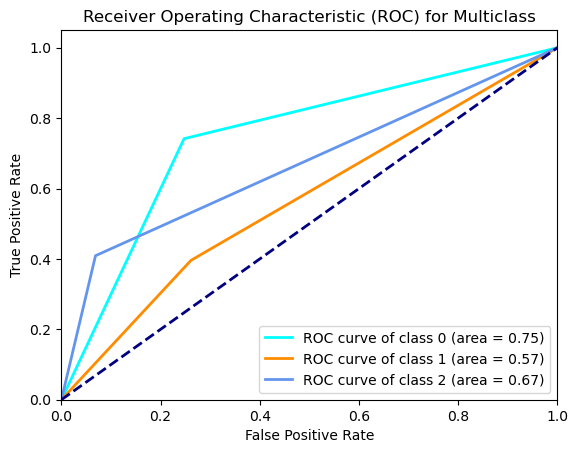

In [40]:
# Plot ROC curve
plt.figure()
colors = ['aqua', 'darkorange', 'cornflowerblue']  # Adjust colors based on the number of classes
for i, color in zip(range(y_test_binarized.shape[1]), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve of class {i} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for Multiclass')
plt.legend(loc='lower right')
plt.show()

In [41]:
# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

In [42]:
# Define hyperparameters to tune
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}


In [43]:
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')


In [44]:
# Fit GridSearchCV
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [45]:
# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [46]:
print(f"Best Parameters: {best_params}")
print(f"Best Cross-validation Score: {best_score}")

Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 10}
Best Cross-validation Score: 0.49307510628247525


In [47]:
# Visualize the decision tree
from sklearn.tree import plot_tree

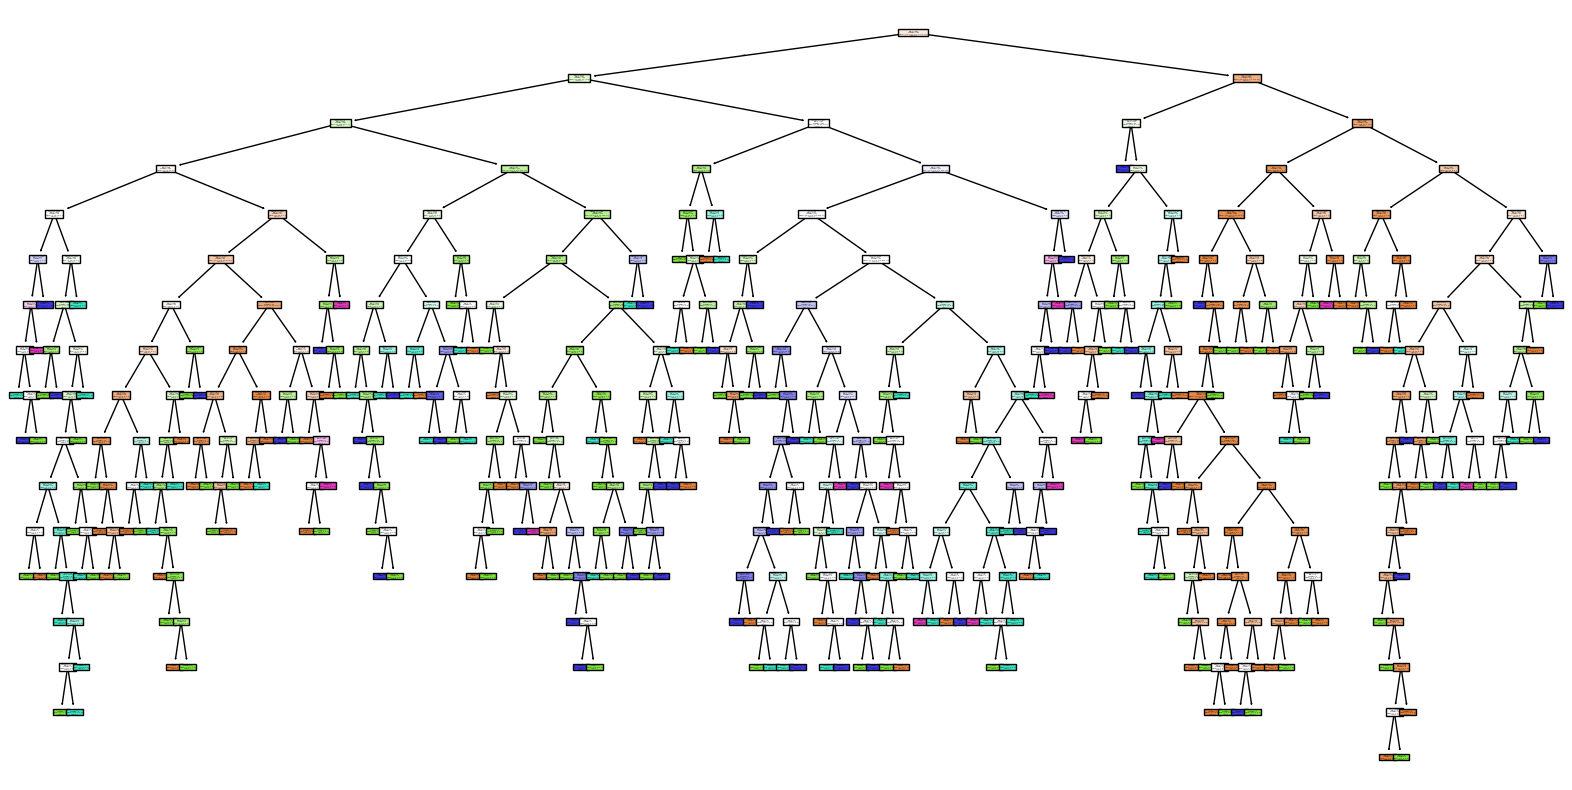

In [49]:
# Plot the decision tree
plt.figure(figsize=(20, 10))
class_names = [str(cls) for cls in clf.classes_]  # Ensure class_names matches the number of classes
plot_tree(clf, filled=True, feature_names=X.columns, class_names=class_names)
plt.show()

In [50]:
# Identifying important features
feature_importances = pd.DataFrame(clf.feature_importances_, index=X.columns, columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)

          importance
chol        0.171861
thalch      0.162456
age         0.150579
cp          0.124592
trestbps    0.109724
oldpeak     0.092964
exang       0.050606
thal        0.034172
restecg     0.031494
fbs         0.029087
slope       0.024175
sex         0.018289


In [ ]:
"""What are some common hyperparameters of decision tree models, and how do they affect the model's performance?
ecision tree models have several hyperparameters that can significantly influence their performance and behavior. 
Here are some of the most common hyperparameters and their effects:

max_depth: This parameter controls the maximum depth of the tree.

Effect: A deeper tree can capture more complex patterns in the data but is also more prone to overfitting. 
Setting a maximum depth can help prevent overfitting by limiting the complexity of the model.
min_samples_split: The minimum number of samples required to split an internal node.

Effect: Higher values prevent the model from learning overly specific patterns (which might be noise) by 
requiring a larger number of samples for a split, thereby reducing overfitting.
min_samples_leaf: The minimum number of samples required to be at a leaf node.

Effect: Similar to min_samples_split, this parameter helps in preventing overfitting.
A higher value means leaves must have more samples, which can make the model more general.
max_features: The number of features to consider when looking for the best split.

Effect: Limiting the number of features can help reduce the model's variance by introducing more randomness 
into the tree-building process, leading to a more robust model. It's especially useful in ensemble methods like Random Forests.
"""

In [ ]:
"""What is the difference between the Label encoding and One-hot encoding?
Label encoding and one-hot encoding are two techniques used to convert categorical data into numerical data so that
machine learning algorithms can process it. 
Label Encoding
Definition: Label encoding converts each unique category value in a column to a unique integer.

How it works:

Each category in a categorical feature is assigned a unique integer value.
For example, if a feature "Color" has categories ["Red", "Green", "Blue"], label encoding might convert these to [0, 1, 2] 
respectively.

One-Hot Encoding
Definition: One-hot encoding creates a new binary column for each category in the original feature, indicating the
presence of each category with a 1 or 0.

How it works:

Each category is converted into a binary vector where only the position corresponding to the category is set to 1, 
and all other positions are set to 0.
For example, the feature "Color" with categories ["Red", "Green", "Blue"] would be transformed into three binary 
features: ["Red", "Green", "Blue"]. If an instance has the value "Green", it would be encoded as [0, 1, 0]."""